## Breast cancer wisconsin
Realizar un modelo con un dataset que se encuentra en kaggle sobre datos clinicos de celulas de cancer de mama, la idea es aplicar lo estudiado para poder determinar y predcir si una celula es maligna o benigna, usando los mismos pasos que el dataset de mnist

1.Cargar datos del dataset

2. Dividir el conjunto de datos en entrenamiento y prueba

3. preprocesar datos y prepararlos o escalarlos

4. Seleccionar un modelo para entrenar

5. entrenar el modelo

6. Evaluar el modelo

6.1 Medir accuracy con solo entrenamiento y prueba

6.2 Medir accuracy con cross value para evaluar el modelo

6.3 Comparar el rendimiento del clasificador mediante dummyclassifier

6.4 Implementar la matriz de confusion

6.5 Implementar Precision (cuantas veces mi modelo **dice** es realmente cierto)

6.6 Implementar Recall (cuantas veces mi modelo es capaz de 
identificar la verdad)

6.7 implementar f1 score (mezcla de precision y recall)

6.8 implementar el TradeOff de recall y precision, apartir de los 
umbrales

6.9 Implementar la curva de Roc

6.10 Comparar dos modelos con curva roc

6.11 Multiclase

6.12 Analizar el error con graficos (ver si se puede)

In [9]:
#Cargar datos del dataset
import pandas as pd
#def load_breast_cancer():
 #   from sklearn.datasets import load_breast_cancer
  #  return load_breast_cancer()

#load_data=load_breast_cancer()

#print(load_data.keys())

#Cargar del csv

data=pd.read_csv('/home/juan-pablo/Escritorio/Sist inteligente/datasets/data.csv')
display(data.head())
#print(data.info())
#print(data.describe())
# verificar columnas con datos faltantes
print(data.isnull().sum())
#columna unnamed con nulas
#data.dropna(axis=1,inplace=True)
display(data.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
#Preprocesamiento de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Eliminar la columna 'ID del paciente'
#data = data.drop('id', axis=1)
if data.shape[0] == 0:
    raise ValueError("No hay muestras restantes después de la limpieza de datos")

# Separar los datos en entradas y etiquetas
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
# Borro ultima columna que no tiene datos

X = X.drop(['id', 'Unnamed: 32'], axis=1)

# Crear una canalización para imputar valores faltantes y escalar las características numéricas
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)
# Aplicar la canalización a los datos de entrada
X = pipeline.fit_transform(X)




In [11]:
#Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import cross_val_score, train_test_split
#divido en entrenamiento, borro la columna diagnosis arriba X(caracteeristicas) y prueba Y (etiquetas) y guardo la columna diagnosis
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [12]:
#Seleccionar un modelo para entrenar
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)

accuracy=cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

print("Accuracy con validacion cruzada: ",accuracy)

Accuracy con validacion cruzada:  [0.96052632 0.94078947 0.98013245]


In [13]:
#Ahora entreno el modelo y calculo la prediccion con accuracy_Score
from sklearn.metrics import accuracy_score
#Entreno el modelo
sgd_clf=sgd_clf.fit(x_train,y_train)
#Hago la prdiccion
y_pred=sgd_clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy con division entrenamiento y prueba: ",accuracy)

Accuracy con division entrenamiento y prueba:  0.9473684210526315


In [14]:
#6.3 entrenar el modelo con dummy classifier
from sklearn.dummy import DummyClassifier

#creo el clasificador dummy
Most_Frecuent=DummyClassifier(strategy='most_frequent')

#hago validacion cruzada, le paso el clasifcador, caracteristicas, etiquetas, numero de divisiones, y la metrica
accuracy_cross_value=cross_val_score(Most_Frecuent,x_train,y_train,cv=3,scoring='accuracy')


print("Accuracy con validacion cruzada: ",accuracy_cross_value)
#osea el porcentaje que saque va a ser el de la etiqueta mas frecuente

# Obtener el valor más frecuente en y_train
most_frequent_class = y_train.value_counts().idxmax()

# Imprimir la clase más frecuente
print("La clase más frecuente en y_train es:", most_frequent_class)

Accuracy con validacion cruzada:  [0.63815789 0.63815789 0.63576159]
La clase más frecuente en y_train es: B


In [15]:
#Implementacion de matriz de confusion
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)
confusion_matrix(y_train,y_pred)

#0.0 =tp
#0.1 =fp
#1.0 =fn
#1.1 =tn



array([[281,   9],
       [  9, 156]])

In [16]:
#Implementacion de precision y recall
#Precision = tp/(tp+fp)
#Cuantas veces lo que mi modelo dice es cierto?

from sklearn.metrics import precision_score, recall_score

precision=precision_score(y_train,y_pred,pos_label='M')

recall=recall_score(y_train,y_pred,pos_label='M')
print("Precision: ",precision)
print("Recall: ",recall)

Precision:  0.9454545454545454
Recall:  0.9454545454545454


F1 Score: 0.9454545454545454


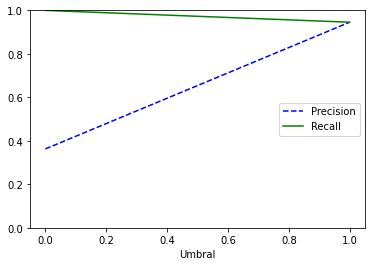

In [17]:
#F1 scor y  trade off
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
print("F1 Score:", f1_score(y_train,y_pred,pos_label='M'))

#para poder hacer la resta de un vector con etiquetas numericas y no caracteres
encoder = LabelEncoder()
y_true = encoder.fit_transform(y_train)
y_pred = encoder.transform(y_pred)
from sklearn.metrics import precision_recall_curve 
precision,recall,thresholds=precision_recall_curve(y_train,y_pred,pos_label='M')
def plot_precision_recall_vs_threshold(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
    plt.xlabel('Umbral')
    plt.legend(loc='center right')
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precision,recall,thresholds)
plt.show()

#ta rara la funcion

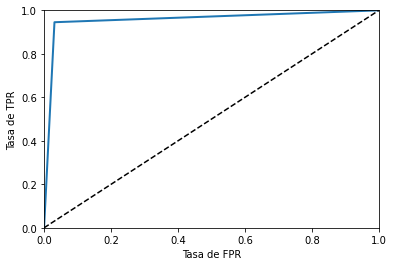

In [18]:
#Curva ROC
from sklearn.metrics import roc_curve

#Calculo tasa de fpr, tasa de tpr y umbral
fpr,tpr,thresholds=roc_curve(y_train,y_pred,pos_label='M')

#Defino la funcion para graficar la curva ROC
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('Tasa de FPR')
    plt.ylabel('Tasa de TPR')
plot_roc_curve(fpr,tpr)
plt.show()

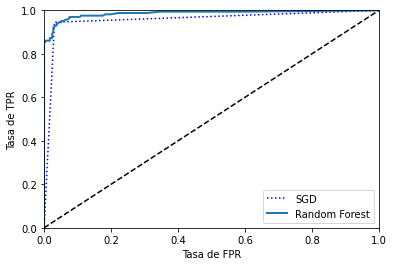

In [19]:
#curva roc para comparar 2 modelos
from sklearn.ensemble import RandomForestClassifier
#instancio el clasificador
forest_clf=RandomForestClassifier(random_state=42)
#obtengo las probabilidades de la clase positiva mediante cross_val_predict
y_probab_forest=cross_val_predict(forest_clf,x_train,y_train,cv=3,method='predict_proba')

#obtengo las probabilidades de la clase positiva
y_scores_forest=y_probab_forest[:,1]

#Calculo curva roc
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train,y_scores_forest,pos_label='M')

#grafocp curva roc
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,label='Random Forest')
plt.legend(loc='lower right')
plt.show()

In [20]:
#Multiclase
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SGDClassifier(random_state=42))
ovr_clf.fit(x_train,y_train)

sgd_clf.fit(x_train,y_train)

pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)
print("Predict: ", pred)
accuracy=cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')
print("Accuracy con validacion cruzada: ",accuracy)

Predict:  ['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 

Confusion matrix:
[[281   9]
 [  9 156]]


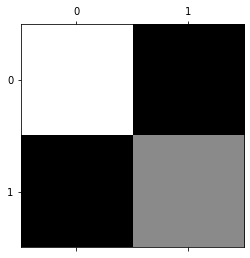

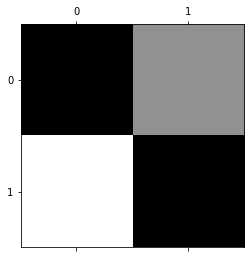

In [21]:
#Analizar el error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Obtener las predicciones utilizando validación cruzada
y_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

# Obtener la matriz de confusión utilizando los datos de entrenamiento y las predicciones
conf_mx = confusion_matrix(y_train, y_pred)
print(f'Confusion matrix:\n{conf_mx}')

# Mostrar la matriz de confusión como una imagen
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Calcular la tasa de error por clase
# Calcular la suma de las filas de la matriz de confusión y mantener las dimensiones
row_sums = conf_mx.sum(axis=1, keepdims=True)

# Dividir cada elemento de la matriz de confusión por la suma de su fila
norm_conf_mx = conf_mx / row_sums

# Rellenar la diagonal con ceros para que no se muestre en el gráfico
np.fill_diagonal(norm_conf_mx, 0)

# Mostrar la matriz normalizada como una imagen en escala de grises
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()